In [1]:
import json
import numpy as np
import sys, pathlib
sys.path.insert(0, str(pathlib.Path().resolve().parent))

import matplotlib.pyplot as plt
import matplotlib
import seaborn
seaborn.set()
seaborn.set_style('whitegrid')
plt.rcParams.update({'figure.figsize' : (24, 12),
                     # bigger labels for readability
                    'font.size' : 32,
                    'axes.labelsize' : 32,
                    'xtick.labelsize' : 28,
                    'ytick.labelsize' : 28,
                     'axes.titlesize' : 32,
                     # Latex-like fonts
                     'text.usetex' : True,
                     'font.family' : 'serif',
                     'font.serif' : 'Computer Modern',
                     'mathtext.fontset' : 'cm',
                     'mathtext.rm' : 'Bitstream Vera Sans',
                     'mathtext.it' : 'Bitstream Vera Sans:italic',
                     'mathtext.bf' : 'Bitstream Ver Sans:bold',
                      'lines.linewidth' : 3,
                    })

datasets = [
    'temperature',
    'precipitation',
    'houseprice',
]

models = [
    'SGPR-points-cv_SE',
    'IFF_SE',
    'VISH-chordal_SE',
    'SGPR-points-cv_M52',
    'IFF_M52',
    'VFF_M52',
    'VISH-chordal_M52'
    'ASVGP_M52',
    'SKI_M52',
    'SKI_SE',
]

configs = {('precipitation', 'SGPR-points-cv_SE') : [100, 200, 400, 600, 800, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 3600],
           ('precipitation', 'IFF_SE') : [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60],
           #('precipitation', 'SGPR-points-cv_M52') : [100, 200, 400, 600, 800, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 3600],
           #('precipitation', 'IFF_M52') : [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60],
           ('precipitation', 'VFF_M52') : [6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61],
           ('precipitation', 'ASVGP_M52') : [12, 24, 36, 48, 60, 72, 84, 96],
           ('precipitation', 'SKI_SE') : [152],
           #('precipitation', 'VISH-chordal_SE') : [9, 18, 27, 36],
           #('precipitation', 'VISH-chordal_M52') : [9, 18, 27, 36],
           #
           #('temperature', 'SGPR-points-cv_SE') : [100, 200, 400, 600, 800, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 3600],
           #('temperature', 'IFF_SE') : [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60],
           #('temperature', 'VISH-chordal_SE') : [100, 200, 400, 600, 800, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000],
           ('temperature', 'SGPR-points-cv_M52') : [100, 200, 400, 600, 800, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 3600],
           ('temperature', 'IFF_M52') : [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60],
           ('temperature', 'VFF_M52') : [6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61],
           ('temperature', 'ASVGP_M52') : [12, 24, 36, 48, 60, 72, 84, 96],
           #('temperature', 'VISH-chordal_SE') : [9, 18, 27, 36, 45],
           ('temperature', 'VISH-chordal_M52') : [9, 18, 27, 36, 45],
           #('temperature', 'SKI_M52') : [28, 56, 113, 169],
           ('temperature', 'SKI_SE') : [28, 56, 113, 169],
           #('houseprice' , 'SGPR-points-cv_SE') : [100, 200, 400, 600, 800, 1200, 1500, 1750, 2000, 2250, 2500, 2750, 3000],
           ('houseprice' , 'IFF_SE') :[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60],
           ('houseprice' , 'SGPR-points-cv_M52') : [100, 200, 400, 600, 800, 1200, 1500, 1750, 2000, 2250, 2500, 2750, 3000], 
           ('houseprice', 'VFF_M52') : [6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61],
           ('houseprice', 'ASVGP_M52') : [12, 24, 36, 48, 60, 72, 84, 96],
           ('houseprice', 'SKI_SE') : [326],
           #('houseprice' , 'IFF_M52') : [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60],
           #('houseprice', 'VISH-chordal_SE') : [9, 18, 27, 36],
           #('houeprice', 'VISH-chordal_M52') : [9, 18, 27, 36],
          } 

seeds = [
    12,
    17,
    44,
    92,
    101
]

C:\Users\talay\AppData\Local\Temp\ipykernel_2960\43642490.py:33: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = m.colorbar(ticks=level, location='bottom', pad='5%')


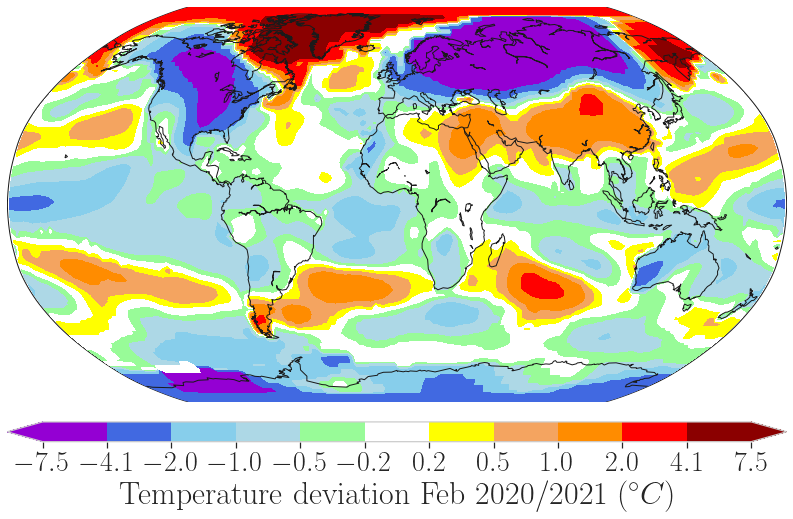

In [2]:
from netCDF4 import Dataset as NetCDFFile
import pyproj
import lab, math
import pandas as pd
from mpl_toolkits.basemap import Basemap, cm
import matplotlib.colors as mcolors
trends = ['darkviolet','royalblue', 'skyblue','lightblue','palegreen','white','yellow','sandybrown','darkorange','red','darkred']

tt=matplotlib.colors.ListedColormap(trends)

# temperature
fname = '../data/trends_feb_2020_2021.nc'
nc = NetCDFFile(fname)
data = nc['TEMPTREND'][:, :]
lons = nc['lon'][:]
lats = nc['lat'][:]

lons, lats = np.meshgrid(lons, lats)


plt.figure(figsize=(14,8))
# create polar stereographic Basemap instance.
m = Basemap(projection='robin',lon_0=0, resolution='c')
m.drawcoastlines()
x, y = m(lons, lats)

level = [-7.5,-4.1,-2.0,-1.0,-0.5,-0.2,0.2,0.5,1.0,2.0,4.1,7.5]
norm = mcolors.BoundaryNorm(level, 11, clip=True)

cs = m.contourf(x, y ,data,levels=level,cmap=tt, alpha=1,vmin=-4.1,vmax=4.1, extend='both', norm=norm)
cs.cmap.set_under(color='darkviolet')
cs.cmap.set_over(color='darkred')
cbar = m.colorbar(ticks=level, location='bottom', pad='5%')
cbar.set_label(r'Temperature deviation Feb 2020/2021 ($^{\circ}C$)')
#plt.title('Land & Sea temperature trends Feb 2020/2021')
#plt.show()
plt.savefig('temperature.png')

# Reporting $N, D$

First we load each dataset in turn, generate an 80/20 train/test split, and report the values of $N$ and $D$ recorded in Table 1. Also, report the number of test points and normalising standard deviation of $y$, in case this is needed to compare to other results (for example, to renormalise the RMSE and NLPD, or unscale by the number of variables).

In [3]:
from netCDF4 import Dataset as NetCDFFile
import pyproj
import lab, math
import pandas as pd

rng = np.random.default_rng(12)

# precipitation
fname = '../data/nws_precip_mtd_20210101_conus.nc'
nc = NetCDFFile(fname)
data = 25.4*nc.variables['normal'][:][::4, ::4]
x_n, y_n = nc.variables['x'][:][::4], nc.variables['y'][::-1][::4]
x_grid, y_grid= np.meshgrid(x_n,y_n)
p = pyproj.Proj(projparams='+proj=stere +lat_0=90 +lat_ts=60 +lon_0=-105 +x_0=0 +y_0=0 +a=6371200 +b=6371200 +units=m +no_defs')
lons, lats = p(x_grid, y_grid, inverse=True)

lons_real = lons[~data.mask]
lats_real = lats[~data.mask]
data_real = data[~data.mask]

x = np.array(np.vstack((lons_real.flatten(), lats_real.flatten())).T).astype(np.float64)
y = np.array(data_real.flatten()).astype(np.float64)

stdx = lab.std(x, axis=-2)
meanx = lab.mean(x, axis=-2)
x = (x -  meanx) / stdx
stdy = lab.std(y, axis=-1)
meany = lab.mean(y, axis=-1)
y = (y - meany) / stdy

num_train = math.ceil(80/100 * y.shape[0])
idx = np.arange(0, y.shape[0], 1)
rng.shuffle(idx)
train_idx = idx[:num_train]
test_idx = idx[num_train:]
x_train = x[..., train_idx, :]
y_train = y[..., train_idx]
x_test = x[..., test_idx, :]
y_test = y[..., test_idx]

N = y_train.shape[0]
D = x.shape[-1]
width = x_train.max() - x_train.min()

print('-------------------------------------------------------------')
print('precipitation:')
print('-------------------------------------------------------------')
print('N={} \t D={} \t N_test={} \t stdy={:.3f}'.format(N, D, y_test.shape[0], stdy))

# temperature
fname = '../data/trends_feb_2020_2021.nc'
nc = NetCDFFile(fname)
data = nc['TEMPTREND'][:, :]
lons = nc['lon'][:]
lats = nc['lat'][:]

lons, lats = np.meshgrid(lons, lats)

lons_real = lons[~data.mask]
lats_real = lats[~data.mask]
data_real = data[~data.mask]

x = np.array(np.vstack((lons_real.flatten(), lats_real.flatten())).T).astype(np.float64)
y = np.array(data_real.flatten()).astype(np.float64)

stdx = lab.std(x, axis=-2)
meanx = lab.mean(x, axis=-2)
x = (x -  meanx) / stdx
stdy = lab.std(y, axis=-1)
meany = lab.mean(y, axis=-1)
y = (y - meany) / stdy

num_train = math.ceil(80/100 * y.shape[0])
idx = np.arange(0, y.shape[0], 1)
rng.shuffle(idx)
train_idx = idx[:num_train]
test_idx = idx[num_train:]
x_train = x[..., train_idx, :]
y_train = y[..., train_idx]
x_test = x[..., test_idx, :]
y_test = y[..., test_idx]

N = y_train.shape[0]
D = x.shape[-1]
width = x_train.max() - x_train.min()
print('-------------------------------------------------------------')
print('temperature:')
print('-------------------------------------------------------------')
print('N={} \t D={} \t N_test={} \t stdy={:.3f}'.format(N, D, y_test.shape[0], stdy))

# houseprice
fname = '../data/england_wales_house_prices.csv'
df = pd.read_csv(fname)
df = df.sample(frac=0.2, random_state=1)

x = np.array(np.vstack((df['longitude'], df['latitude'])).T)
y = np.array(np.log(df['price']).to_numpy())

stdx = lab.std(x, axis=-2)
meanx = lab.mean(x, axis=-2)
x = (x -  meanx) / stdx
stdy = lab.std(y, axis=-1)
meany = lab.mean(y, axis=-1)
y = (y - meany) / stdy

num_train = math.ceil(80/100 * y.shape[0])
idx = np.arange(0, y.shape[0], 1)
rng.shuffle(idx)
train_idx = idx[:num_train]
test_idx = idx[num_train:]
x_train = x[..., train_idx, :]
y_train = y[..., train_idx]
x_test = x[..., test_idx, :]
y_test = y[..., test_idx]

N = y_train.shape[0]
D = x.shape[-1]
width = x_train.max() - x_train.min()
print('-------------------------------------------------------------')
print('houseprice:')
print('-------------------------------------------------------------')
print('N={} \t D={} \t N_test={} \t stdy={:.3f}'.format(N, D, y_test.shape[0], stdy))


d:\OneDrive\Work\mlg\projects\vff\.vff-venv\lib\site-packages\numpy\ma\core.py:1013: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


-------------------------------------------------------------
precipitation:
-------------------------------------------------------------
N=23144 	 D=2 	 N_test=5785 	 stdy=58.855
-------------------------------------------------------------
temperature:
-------------------------------------------------------------
N=12947 	 D=2 	 N_test=3236 	 stdy=2.766
-------------------------------------------------------------
houseprice:
-------------------------------------------------------------
N=106875 	 D=2 	 N_test=26718 	 stdy=0.642


C:\Users\talay\AppData\Local\Temp\ipykernel_2960\626953247.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


-------------------------------------------------------------
temperature:
-------------------------------------------------------------
Normalising times in seconds: [1828.0731810815632, 1413.3355804383755, 2276.3660259768367, 1475.0132148973644, 3007.8161508217454]
SGPR-points-cv_M52:
	 100 	 RMSE: 0.8354 (0.0074) 	 NLPD: 1.2431 (0.0071) 	 NVFE: 0.3053 (0.0094) 	 time: 0.0036 (0.0007)
	 200 	 RMSE: 0.6256 (0.0152) 	 NLPD: 0.9544 (0.0213) 	 NVFE: 0.0318 (0.0133) 	 time: 0.0085 (0.0025)
	 400 	 RMSE: 0.4688 (0.0117) 	 NLPD: 0.6652 (0.0211) 	 NVFE: -0.2415 (0.0066) 	 time: 0.0334 (0.0066)
	 600 	 RMSE: 0.4286 (0.0136) 	 NLPD: 0.5792 (0.0294) 	 NVFE: -0.3301 (0.0049) 	 time: 0.0540 (0.0131)
	 800 	 RMSE: 0.4017 (0.0120) 	 NLPD: 0.5130 (0.0268) 	 NVFE: -0.3854 (0.0059) 	 time: 0.0572 (0.0069)
	 1000 	 RMSE: 0.3720 (0.0078) 	 NLPD: 0.4353 (0.0184) 	 NVFE: -0.4409 (0.0076) 	 time: 0.1258 (0.0262)
	 1250 	 RMSE: 0.3486 (0.0078) 	 NLPD: 0.3696 (0.0206) 	 NVFE: -0.4949 (0.0056) 	 time: 0.1504 

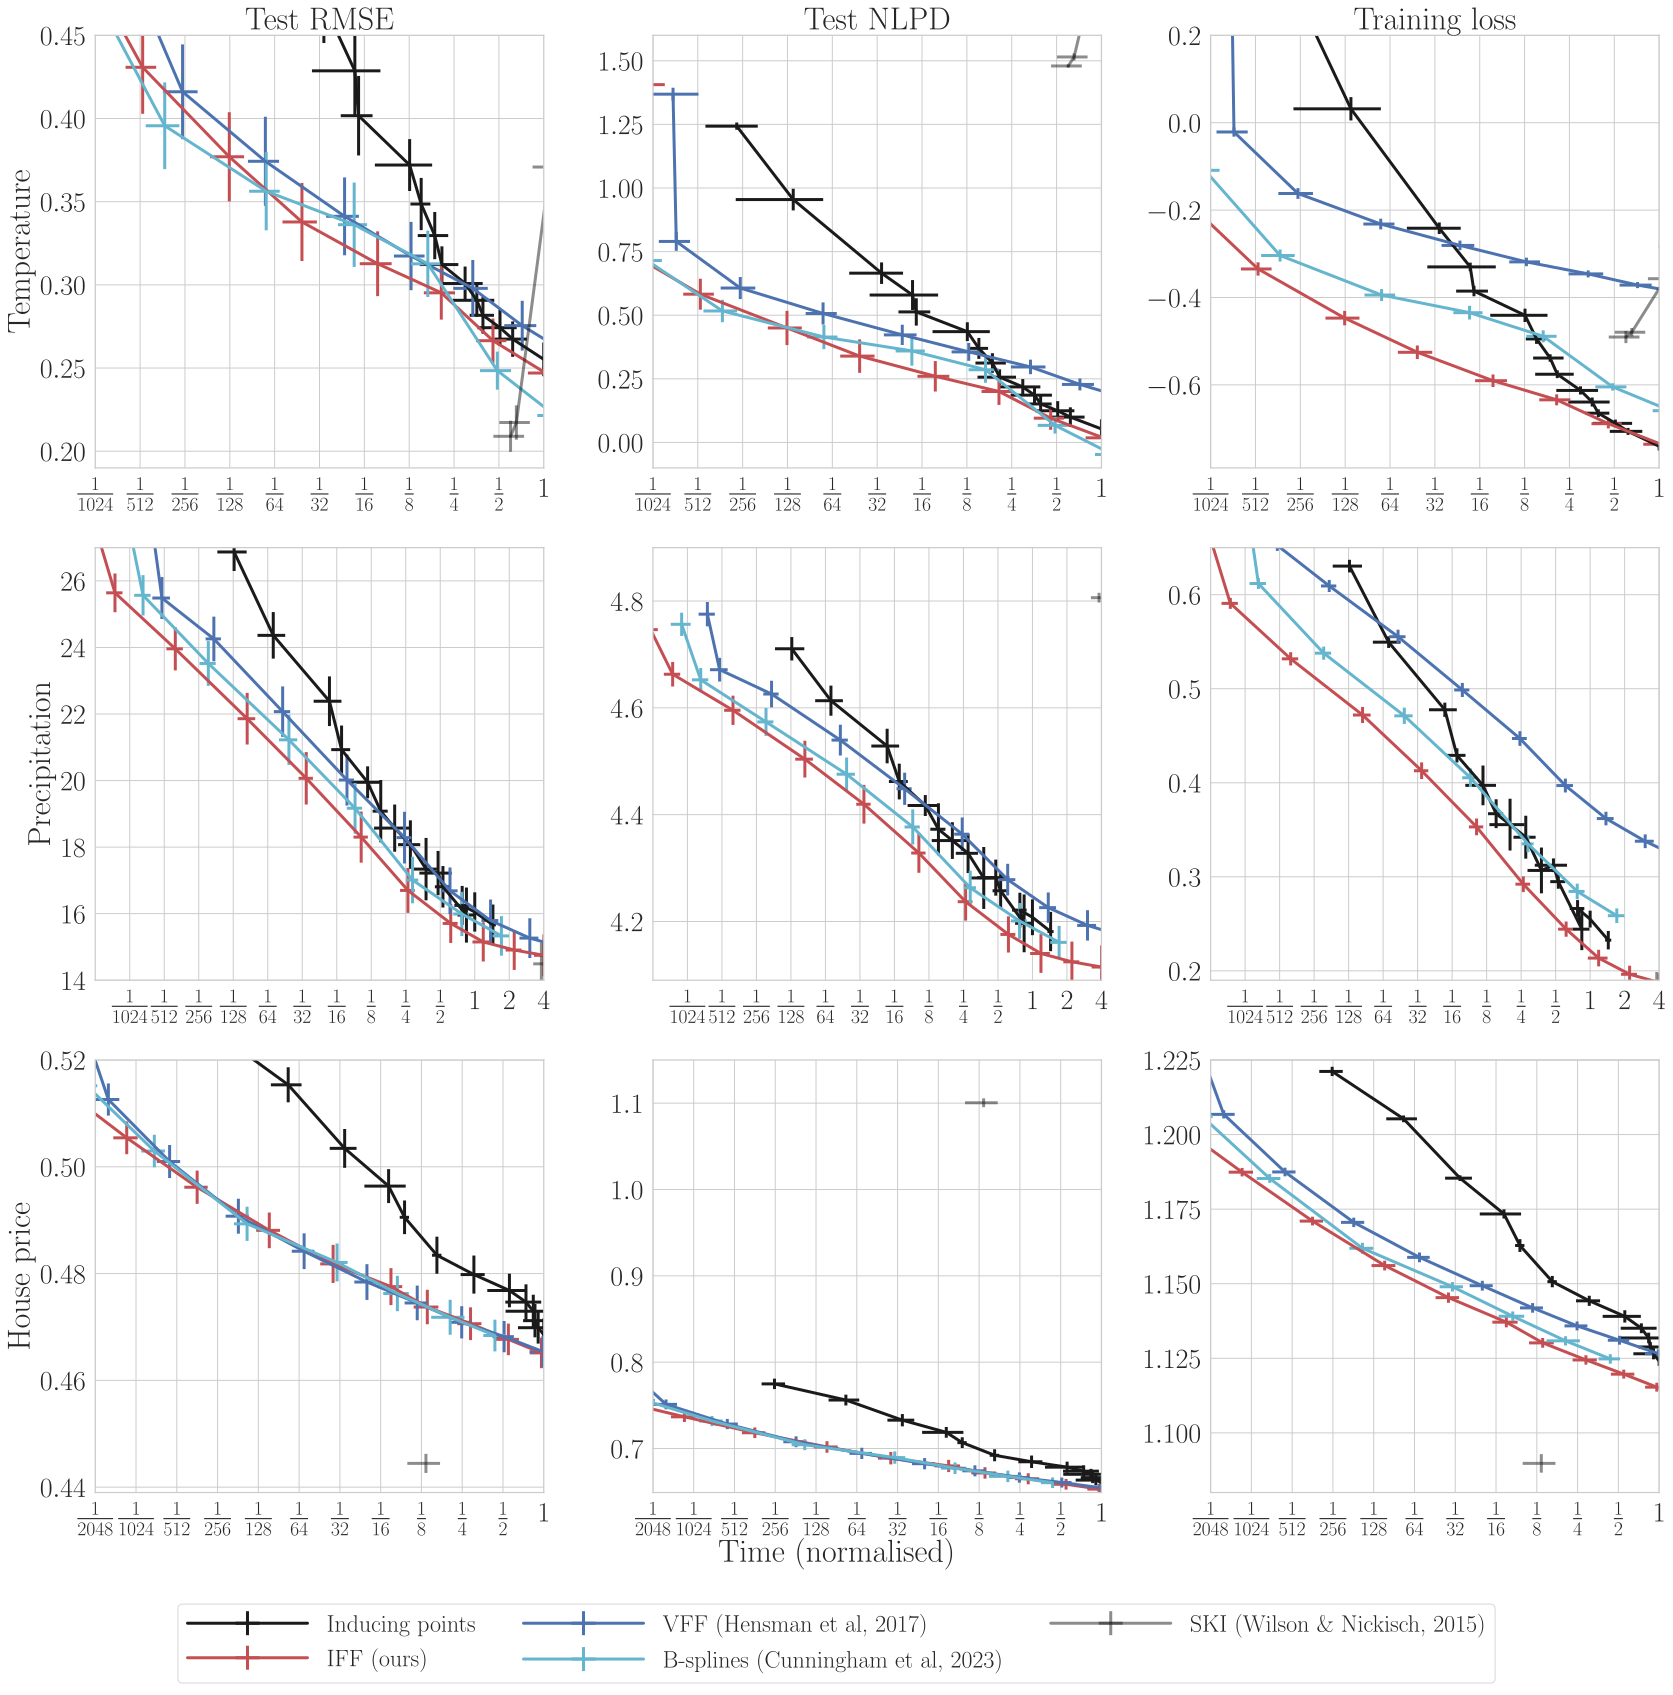

<Figure size 1728x1728 with 0 Axes>

In [15]:
plt.rcParams['svg.fonttype'] = 'none'
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
plt.rcParams.update({'figure.figsize' : (24, 24),})

with_SKI = True

# plot style for each method

models = [
    'SGPR-points-cv_SE',
    'IFF_SE',
    #'VISH-chordal_SE',
    'SGPR-points-cv_M52',
    'IFF_M52',
    'VFF_M52',
    #'VISH-chordal_M52',
    #'SVGP_SE',
    #'SVGP_M52',
    'ASVGP_M52',
    #'SKI_M52',
    #'SKI_SE',
]

if with_SKI:
    models.append("SKI_SE")

labels = {
    'SGPR-points-cv_SE' : 'Inducing points',
    'IFF_SE' : 'IFF (ours)',
    'VISH-chordal_SE' : 'VISH SE',
    'SGPR-points-cv_M52' : 'Inducing points',
    'SVGP_SE' : 'SVGP SE',
    'SVGP_M52' : 'SVGP Matérn-5/2',
    'IFF_M52' : 'IFF (ours)',
    'VISH-chordal_M52' : 'VISH (Dutordoir et al, 2020)',
    'VFF_M52' : 'VFF (Hensman et al, 2017)',
    'ASVGP_M52' : 'B-splines (Cunningham et al, 2023)',
    'SKI_M52' : 'SKI M52',
    'SKI_SE' : 'SKI (Wilson \& Nickisch, 2015)' ,
}


styles = {
    'IFF' : ('r', 'solid', 1),
    'VFF' : ('b', 'solid', 1),
    'SGPR-points-cv_SE' : ('k', 'solid', 1.),
    'SVGP_SE' : ('k', 'solid', 1.),
    'IFF_SE' : ('r', 'solid', 1),
    'VISH-chordal_SE' : ('k', 'solid', 1.),
    'SGPR-points-cv_M52' : ('k', 'solid', 1.),
    'SVGP_M52' : ('k', 'solid', 1.),
    'IFF_M52' : ('r', 'solid', 1),
    'VISH-chordal_M52' : ('k', 'solid', 1.),
    'VFF_M52' : ('b', 'solid', 1),
    'ASVGP_M52' : ('c', 'solid', 1),
    'SKI_M52' : ('k', 'dashed', .5),
    'SKI_SE' : ('k', 'solid', .5),
}

title = {
    'precipitation' : 'Precipitation',
    'temperature' : 'Temperature',
    'houseprice' : 'House price',
}

normaliser = {
    'temperature' : ('SGPR-points-cv_M52', 3600),
    'precipitation' : ('SGPR-points-cv_SE', 3000),
    'houseprice' : ('SGPR-points-cv_M52', 3000)
}
fig, axs = plt.subplots(3, 3,)
for d_idx, dataset in enumerate(datasets):
    print('-------------------------------------------------------------')
    print(dataset + ':')
    print('-------------------------------------------------------------')
    # sort out time normalisation
    base_t = []
    lbl, idx = normaliser[dataset]
    for seed in seeds:
        f = open(str(pathlib.Path().resolve().parent) 
                         + '/experiments/logs/re/{}/{}_{}_{}.json'.format(dataset, lbl, idx, seed),
                        )
        results = json.load(f)
        base_t = base_t + [results['time']]      
        f.close()
    print("Normalising times in seconds:", base_t)
    
    for model in models:
        try:
            Ms = configs[(dataset, model)]
            print(model + ':')
            
        # iterate over the M values, print the values but also plot them
            rmse_m = []
            nlpd_m = []
            nvfe_m = []
            time_m = []
            rmse_s = []
            nlpd_s = []
            nvfe_s = []
            time_s = []

            for m in Ms:
                rmse = []
                nlpd = []
                nvfe = []
                time = []

                for i, seed in enumerate(seeds):
                    f = open(str(pathlib.Path().resolve().parent) 
                         + '/experiments/logs/re/{}/{}_{}_{}.json'.format(dataset, model, m, seed),
                        )
                    results = json.load(f)
                    rmse = rmse + [results['RMSE']]
                    nlpd = nlpd + [results['NLPD']]
                    nvfe = nvfe + [results['NVFE']]
                    time = time + [results['time']/base_t[i]]
                    if model in ["SKI_M52", "SKI_SE"]:
                        m_proper = np.prod(results['Grid size'])
                    else:
                        m_proper = results['M']
                    f.close()
                rmse = np.array(rmse)
                nlpd = np.array(nlpd)
                nvfe = np.array(nvfe)
                time = np.array(time)

                print('\t {} \t RMSE: {:.4f} ({:.4f}) \t NLPD: {:.4f} ({:.4f}) \t NVFE: {:.4f} ({:.4f}) \t time: {:.4f} ({:.4f})'.format(
                            m_proper,
                            np.mean(rmse), np.std(rmse)/np.sqrt(len(seeds)),
                            np.mean(nlpd), np.std(nlpd)/np.sqrt(len(seeds)),
                            np.mean(nvfe), np.std(nvfe)/np.sqrt(len(seeds)),
                            np.mean(time), np.std(time)/np.sqrt(len(seeds)),
                )
                     )
                rmse_m = rmse_m + [np.mean(rmse)]
                rmse_s = rmse_s + [np.std(rmse)/np.sqrt(len(seeds))]
                nlpd_m = nlpd_m + [np.mean(nlpd)]
                nlpd_s = nlpd_s + [np.std(nlpd)/np.sqrt(len(seeds))]
                nvfe_m = nvfe_m + [np.mean(nvfe)]
                nvfe_s = nvfe_s + [np.std(nvfe)/np.sqrt(len(seeds))]
                time_m = time_m + [np.mean(time)]
                time_s = time_s + [np.std(time)/np.sqrt(len(seeds))]


            axs[d_idx][0].errorbar(x=np.array(time_m), y=np.array(rmse_m), 
                            xerr=2*np.array(time_s),
                           yerr=2*np.array(rmse_s), label=labels[model], color=styles[model][0],
                           linestyle = styles[model][1], alpha=styles[model][2])
            axs[d_idx][1].errorbar(x=np.array(time_m), y=np.array(nlpd_m), 
                            xerr=2*np.array(time_s),
                           yerr=2*np.array(nlpd_s), label=labels[model], color=styles[model][0],
                           linestyle = styles[model][1], alpha=styles[model][2])
            axs[d_idx][2].errorbar(x=np.array(time_m), y=np.array(nvfe_m), 
                            xerr=2*np.array(time_s),
                           yerr=2*np.array(nvfe_s), label=labels[model], color=styles[model][0],
                           linestyle = styles[model][1], alpha=styles[model][2])

        except KeyError:
            continue
    if d_idx==0:
        axs[d_idx][0].set_title(r'Test RMSE')
        axs[d_idx][1].set_title(r'Test NLPD')
        axs[d_idx][2].set_title(r'Training loss')
    axs[d_idx][0].set_ylabel(r'{}'.format(title[dataset]))
    # dataset-specific plotting

    def format_func(n, tn):
        if n > 1:
            return r"${}$".format(int(n))
        for i in range(12):
            if n == 1/(2**i):
                break
        if i == 0:
            return r"$1$"
        else:
            return r"$\frac{{1}}{{{}}}$".format(2**i)
        
    if dataset == 'precipitation':
        for ii in range(3):
            axs[d_idx][ii].set_xscale("log", base=2)
            if with_SKI:
                axs[d_idx][ii].xaxis.set_major_locator(matplotlib.ticker.FixedLocator([1/1024, 1/512, 1/256, 1/128, 1/64, 1/32, 1/16, 1/8, 1/4, 1/2, 1., 2., 4.]))
                axs[d_idx][ii].xaxis.set_major_formatter(plt.FuncFormatter(format_func))
                axs[d_idx][ii].set_xlim(1/2048, 4.)
            else:
                axs[d_idx][ii].xaxis.set_major_locator(matplotlib.ticker.FixedLocator([1/2048, 1/1024, 1/512, 1/256, 1/128, 1/64, 1/32, 1/16, 1/8, 1/4, 1/2, 1.]))
                axs[d_idx][ii].xaxis.set_major_formatter(plt.FuncFormatter(format_func))
                axs[d_idx][ii].set_xlim(1/2048, 1.5)
        if with_SKI:
            axs[d_idx][0].set_ylim(14., 27.)
            axs[d_idx][1].set_ylim(4.09, 4.9)
            axs[d_idx][2].set_ylim(0.19, 0.65)
        else:
            axs[d_idx][0].set_ylim(14.5, 27.)
            axs[d_idx][1].set_ylim(4.09, 4.7)
            axs[d_idx][2].set_ylim(0.19, 0.65)





    if dataset == 'temperature':
        for ii in range(3):
            axs[d_idx][ii].set_xscale("log", base=2)
            if with_SKI:
                axs[d_idx][ii].xaxis.set_major_locator(matplotlib.ticker.FixedLocator([1/1024, 1/512, 1/256, 1/128, 1/64, 1/32, 1/16, 1/8, 1/4, 1/2, 1.]))
                axs[d_idx][ii].xaxis.set_major_formatter(plt.FuncFormatter(format_func))
                axs[d_idx][ii].set_xlim(1/1024, 1.)
            else:
                axs[d_idx][ii].xaxis.set_major_locator(matplotlib.ticker.FixedLocator([1/1024, 1/512, 1/256, 1/128, 1/64, 1/32, 1/16, 1/8, 1/4, 1/2, 1.]))
                axs[d_idx][ii].xaxis.set_major_formatter(plt.FuncFormatter(format_func))
                axs[d_idx][ii].set_xlim(1/1024, 1.)
        if with_SKI:
            axs[d_idx][0].set_ylim(0.19, 0.45)
            axs[d_idx][1].set_ylim(-0.1, 1.6)
            axs[d_idx][2].set_ylim(-0.79, 0.2)
        else:
            axs[d_idx][0].set_ylim(0.19, 0.45)
            axs[d_idx][1].set_ylim(-0.1, 1.)
            axs[d_idx][2].set_ylim(-0.79, 0.2)




    if dataset == "houseprice":
        for ii in range(3):
            axs[d_idx][ii].set_xscale("log", base=2)
            if with_SKI:
                axs[d_idx][ii].xaxis.set_major_locator(matplotlib.ticker.FixedLocator([1/2048, 1/1024, 1/512, 1/256, 1/128, 1/64, 1/32, 1/16, 1/8, 1/4, 1/2, 1.]))
                axs[d_idx][ii].xaxis.set_major_formatter(plt.FuncFormatter(format_func))
                axs[d_idx][ii].set_xlim(1/2048, 1.)
            else:
                axs[d_idx][ii].xaxis.set_major_locator(matplotlib.ticker.FixedLocator([1/2048, 1/1024, 1/512, 1/256, 1/128, 1/64, 1/32, 1/16, 1/8, 1/4, 1/2, 1.]))
                axs[d_idx][ii].xaxis.set_major_formatter(plt.FuncFormatter(format_func))
                axs[d_idx][ii].set_xlim(1/2048, 1.)      
        if with_SKI:
            axs[d_idx][0].set_ylim(0.439, 0.52)
            axs[d_idx][1].set_ylim(0.649, 1.15)
            axs[d_idx][2].set_ylim(1.08, 1.225)
        else:
            axs[d_idx][0].set_ylim(0.461, 0.52)
            axs[d_idx][1].set_ylim(0.649, 0.79)
            axs[d_idx][2].set_ylim(1.11, 1.225)


fig.tight_layout() 

if with_SKI:
    fig.subplots_adjust(bottom=0.12)   ##  Need to play with this number.   
    fig.text(0.5, 0.08, r'Time (normalised)', ha='center')
else:
    fig.subplots_adjust(bottom=0.09)   ##  Need to play with this number.   
    fig.text(0.5, 0.045, r'Time (normalised)', ha='center')

labels_all = []
handles_all = []
for dset in axs:
    for ax in dset:
        hand, labl = ax.get_legend_handles_labels()
        for ii, el in enumerate(labl):
            if el not in labels_all:
                labels_all.append(el)
                handles_all.append(hand[ii])
if with_SKI:
    ncol = 3
else:
    ncol = 4
fig.legend(handles_all, labels_all, handlelength=5, fontsize='24', loc="lower center", ncol=ncol) # need long handlelength to clearly show dashes
if with_SKI:
    plt.savefig('../images/SKI_metrics_plot_combined_log_with_SKI.svg', bbox_inches='tight')
    plt.savefig('../images/SKI_metrics_plot_combined_log_with_SKI.png', bbox_inches='tight')
else:
    plt.savefig('../images/SKI_metrics_plot_combined_log.svg', bbox_inches='tight')
    plt.savefig('../images/SKI_metrics_plot_combined_log.png', bbox_inches='tight')
plt.show()
plt.clf()